<h1><center>Tabela Periódica</center></h1>

<p style="text-align:center">Projeto 1 <br>
MAT013 - Probabilidade e Estatística (turma 02) <br>
Professora: Hevilla Nobre Cezar</p>
<br>
<br>
<table>
  <tr>
    <td>Desenvolvido por:</td>
    <td>Rogério Ribeiro Macêdo (2020016128)</td>
  </tr>
   <tr>
    <td></td>
    <td>Yara Gonçalves de Andrade (2018016372)</td>
  </tr>
</table>


<h1>Importanto bibliotecas</h1>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dados

In [51]:
# Lendo arquivo csv e montando o dataframe
df = pd.read_csv('tabela_periodica.csv')

# Exibiindo apenas alguns elementos
df[(df['AtomicNumber'] == 96) | (df['AtomicNumber'] == 2) | (df['AtomicNumber'] == 6)]

,AtomicNumber,Symbol,Name,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,Period
1,2,He,Hélio,4.00260,NaN,140.0,24.587,NaN,Gás,0.95,4.22,0.000179,Gás Nobre,Período 2
5,6,C,Carbono,12.01100,2.55,170.0,11.260,1.263,Sólido,3823.00,4098.00,2.267000,Não metal,Período 2
95,96,Cm,Cúrio,247.07035,1.30,245.0,6.020,NaN,Sólido,1618.00,3400.00,13.510000,Actinídeos,Período 7


In [52]:
df[df['Electronegativity'] > 3.5]

,AtomicNumber,Symbol,Name,AtomicMass,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,Period
8,9,F,Flúor,18.998403,3.98,135.0,17.423,3.339,Gás,53.53,85.03,0.001696,Halogênio,Período 2


<h2>Renomeando as Colunas</h2>

In [53]:
df.rename(columns={'AtomicNumber': 'NumeroAtomico',
                   'Symbol': 'Simbolo',
                   'Name': 'Nome',
                   'ElectronConfiguration': 'ConfiguracaoEletronica',
                   'AtomicMass': 'MassaAtomica',
                   'Electronegativity': 'Eletronegatividade',
                   'AtomicRadius': 'RaioAtomico',
                   'IonizationEnergy': 'EnergiaDeIonizacao',
                   'ElectronAffinity': 'EletroAfinidade',
                   'OxidationStates': 'EstadosDeOxidacao',
                   'StandardState': 'EstadoPadrao',
                   'MeltingPoint': 'PontoDeFusao',
                   'BoilingPoint': 'PontoDeEbulicao',
                   'GroupBlock': 'Grupo',
                   'YearDiscovered': 'AnoDoDescobimento',
                   'Density': 'Densidade',
                   'Period': 'Período'}, inplace=True)

In [54]:
df.columns


Index(['NumeroAtomico', 'Simbolo', 'Nome', 'MassaAtomica',
       'Eletronegatividade', 'RaioAtomico', 'EnergiaDeIonizacao',
       'EletroAfinidade', 'EstadoPadrao', 'PontoDeFusao', 'PontoDeEbulicao',
       'Densidade', 'Grupo', 'Período'],
      dtype='object')

<h2>Informações sobre os dados</h2>

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NumeroAtomico       118 non-null    int64  
 1   Simbolo             118 non-null    object 
 2   Nome                118 non-null    object 
 3   MassaAtomica        118 non-null    float64
 4   Eletronegatividade  95 non-null     float64
 5   RaioAtomico         99 non-null     float64
 6   EnergiaDeIonizacao  102 non-null    float64
 7   EletroAfinidade     57 non-null     float64
 8   EstadoPadrao        118 non-null    object 
 9   PontoDeFusao        103 non-null    float64
 10  PontoDeEbulicao     93 non-null     float64
 11  Densidade           96 non-null     float64
 12  Grupo               118 non-null    object 
 13  Período             118 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 13.0+ KB


In [56]:
df.head(10)

,NumeroAtomico,Simbolo,Nome,MassaAtomica,Eletronegatividade,RaioAtomico,EnergiaDeIonizacao,EletroAfinidade,EstadoPadrao,PontoDeFusao,PontoDeEbulicao,Densidade,Grupo,Período
0,1,H,Hidrogênio,1.008000,2.20,120.0,13.598,0.754,Gás,13.81,20.28,0.000090,Não metal,Período 1
1,2,He,Hélio,4.002600,NaN,140.0,24.587,NaN,Gás,0.95,4.22,0.000179,Gás Nobre,Período 2
2,3,Li,Lítio,7.000000,0.98,182.0,5.392,0.618,Sólido,453.65,1615.00,0.534000,Metal Alcalino,Período 2
3,4,Be,Berílio,9.012183,1.57,153.0,9.323,NaN,Sólido,1560.00,2744.00,1.850000,Metal Alcalino Terroso,Período 2
4,5,B,Boro,10.810000,2.04,192.0,8.298,0.277,Sólido,2348.00,4273.00,2.370000,Semi-metal,Período 2
5,6,C,Carbono,12.011000,2.55,170.0,11.260,1.263,Sólido,3823.00,4098.00,2.267000,Não metal,Período 2
6,7,N,Nitrogênio,14.007000,3.04,155.0,14.534,NaN,Gás,63.15,77.36,0.001251,Não metal,Período 2
7,8,O,Oxigênio,15.999000,3.44,152.0,13.618,1.461,Gás,54.36,90.20,0.001429,Não metal,Período 2
8,9,F,Flúor,18.998403,3.98,135.0,17.423,3.339,Gás,53.53,85.03,0.001696,Halogênio,Período 2
9,10,Ne,Neônio,20.180000,NaN,154.0,21.565,NaN,Gás,24.56,27.07,0.000900,Gás Nobre,Período 2


<h1>Pré-processamento</h1>

<h2>Valores Nulos</h2>

In [57]:
# Listando as colunas que contém valores nulos
nulos = df.isna().sum()
df_nulos = nulos.reset_index(name='Qtde')
df_nulos[df_nulos.Qtde > 0]


,index,Qtde
4,Eletronegatividade,23
5,RaioAtomico,19
6,EnergiaDeIonizacao,16
7,EletroAfinidade,61
9,PontoDeFusao,15
10,PontoDeEbulicao,25
11,Densidade,22


In [58]:
# listando as cinco primeiras linhas onde a coluna 'MoltingPoint' tem valor NaN
df[df.PontoDeFusao.isna() == True].head()

,NumeroAtomico,Simbolo,Nome,MassaAtomica,Eletronegatividade,RaioAtomico,EnergiaDeIonizacao,EletroAfinidade,EstadoPadrao,PontoDeFusao,PontoDeEbulicao,Densidade,Grupo,Período
103,104,Rf,Rutherfórdio,267.1220,NaN,NaN,NaN,NaN,Sólido,NaN,NaN,NaN,Metal de Transição,Período 7
104,105,Db,Dúbnio,268.1260,NaN,NaN,NaN,NaN,Sólido,NaN,NaN,NaN,Metal de Transição,Período 7
105,106,Sg,Seabórgio,269.1280,NaN,NaN,NaN,NaN,Sólido,NaN,NaN,NaN,Metal de Transição,Período 7
106,107,Bh,Bóhrio,270.1330,NaN,NaN,NaN,NaN,Sólido,NaN,NaN,NaN,Metal de Transição,Período 7
107,108,Hs,Hássio,269.1336,NaN,NaN,NaN,NaN,Sólido,NaN,NaN,NaN,Metal de Transição,Período 7


<h2>Arredondando os valores de Massa Atômica</h2>

In [59]:
# Optou-se para arredondar os valores da Massa Atômica para 2 casas decimais
df.MassaAtomica = np.around(df.MassaAtomica, 3)

In [60]:
# Exibindo os dados de Cúrio e Berquélio para verificar a mudança de arredondamento na massa atômica
df[(df['NumeroAtomico'] == 96) | (df['NumeroAtomico'] == 97)]

,NumeroAtomico,Simbolo,Nome,MassaAtomica,Eletronegatividade,RaioAtomico,EnergiaDeIonizacao,EletroAfinidade,EstadoPadrao,PontoDeFusao,PontoDeEbulicao,Densidade,Grupo,Período
95,96,Cm,Cúrio,247.07,1.3,245.0,6.02,NaN,Sólido,1618.0,3400.0,13.51,Actinídeos,Período 7
96,97,Bk,Berquélio,247.07,1.3,244.0,6.23,NaN,Sólido,1323.0,NaN,14.00,Actinídeos,Período 7


<h1><b>Algumas Estatísticas</b></h1>

Todas as estatísticas abaixo consideram apenas as linhas que contém valores. Os atributos sem valor são desconsiderados.

In [61]:
# Colunas
colunas_numericas = []
for index, value in df.dtypes.items():
    if ((value == 'int64') | (value == 'float64')) & (index != 'NumeroAtomico'):
        colunas_numericas.append(index)

df_estatisticas = pd.DataFrame(colunas_numericas, columns=['Atributos'])
df_estatisticas

,Atributos
0,MassaAtomica
1,Eletronegatividade
2,RaioAtomico
3,EnergiaDeIonizacao
4,EletroAfinidade
5,PontoDeFusao
6,PontoDeEbulicao
7,Densidade


<h2>Valores mínimos e máximos</h2>

In [62]:

min_max = []
for coluna in df_estatisticas['Atributos']:
    maximo = df[df[coluna].isna() == False][coluna].max()
    minimo = df[df[coluna].isna() == False][coluna].min()
    min_max.append([minimo, maximo])

pos_coluna = len(df_estatisticas.columns)
minimo = [i[0] for i in min_max]
maximo = [i[1] for i in min_max]
df_estatisticas.insert(pos_coluna, 'Valor Mínimo', minimo, True)
pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Valor Máximo', maximo, True)
df_estatisticas

,Atributos,Valor Mínimo,Valor Máximo
0,MassaAtomica,1.00800,295.216
1,Eletronegatividade,0.70000,3.980
2,RaioAtomico,120.00000,348.000
3,EnergiaDeIonizacao,3.89400,24.587
4,EletroAfinidade,0.07900,3.617
5,PontoDeFusao,0.95000,3823.000
6,PontoDeEbulicao,4.22000,5869.000
7,Densidade,0.00009,22.570


<h2>Média</h2>

In [63]:
medias = []
for coluna in df_estatisticas['Atributos']:
    vlr_media = np.mean(df[df[coluna].isna() == False][coluna])
    vlr_media = np.around(vlr_media, 4)
    medias.append(vlr_media)
    
# Adicionando coluna Média
pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Média', medias, True)

<h2>Moda</h2>

In [64]:
d = df[df[coluna].isna() == False].groupby([coluna])[coluna].count().reset_index(name='Freq')
maximo = d[d['Freq'] == d['Freq'].max()]

In [65]:
modas = []
for coluna in df_estatisticas['Atributos']:
    d = df[df[coluna].isna() == False].groupby([coluna])[coluna].count().reset_index(name='Freq')
    maximo = d[d['Freq'] == d['Freq'].max()]
    moda = maximo[coluna].values[0]
    if moda <= 1:
        moda = 0
    modas.append(moda)

    pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Moda', modas, True)

<h2>Mediana</h2>

In [66]:
medianas = []
for coluna in df_estatisticas['Atributos']:
    # captura todos os valores do Atributo que não seja igual a NaN
    valores = df[df[coluna].isna() == False][coluna]
    
    # Calcula mediana e adiciona no vetor
    mediana = np.median(valores)
    medianas.append(mediana)
pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Mediana', medianas, True)

<h2>Quartis</h2>
<br>
<ul>
  <li>O primeiro quartil ou quartil inferior (Qi) é o valor do conjunto que delimita os 25% menores valores: 25% dos valores são menores do que Qi e 75% são maiores do que Qi.</li><br>
  <li>O segundo quartil ou quartil do meio é a própria mediana (Md), que separa os 50% menores dos 50% maiores valores.</li><br>
  <li>O terceiro quartil ou quartil superior (Qs) é o valor que delimita os 25% maiores valores: 75% dos valores são menores do que Qs e 25% são maiores do que Qs.</li>
</ul>
<br>

In [67]:
quartil25 = []
quartil50 = []
quartil75 = []
for coluna in df_estatisticas['Atributos']:
    # Primeiro quartil
    primeiro_quartil = df[df[coluna].isna() == False][coluna].quantile([0.25, 0.5, 0.75])[0.25]
    quartil25.append(primeiro_quartil)

    # Segundo Quartil
    segundo_quartil = df[df[coluna].isna() == False][coluna].quantile([0.25, 0.5, 0.75])[0.50]
    quartil50.append(segundo_quartil)
    
    # Terceiro Quartil
    terceiro_quartil = df[df[coluna].isna() == False][coluna].quantile([0.25, 0.5, 0.75])[0.75]
    quartil75.append(terceiro_quartil)
    
pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Primeiro Quartil', quartil25, True)

pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Segundo Quartil', quartil50, True)

pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Terceiro Quartil', quartil75, True)


<h2>Variância</h2>
<br>
\begin{equation}
var(x) = \frac{\sum_{i=1}^{n} (x - \bar{x})^2}{n}
\end{equation}
<br>

In [68]:
variancias = []
for coluna in df_estatisticas['Atributos']:
    variancia = np.var(df[df[coluna].isna() == False][coluna])
    variancia = np.around(variancia, 5)
    variancias.append(variancia)

pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Variância', variancias, True)

<h2>Desvio Padrão</h2>

In [69]:
desvios_padrao = []
for variancia in variancias:
    dp = np.sqrt(variancia)
    desvios_padrao.append(dp)

pos_coluna = len(df_estatisticas.columns)
df_estatisticas.insert(pos_coluna, 'Desvio Padrão', desvios_padrao, True)

<h2>Apresentando as Estatísticas</h2>

In [70]:
df_estatisticas

,Atributos,Valor Mínimo,Valor Máximo,Média,Moda,Mediana,Primeiro Quartil,Segundo Quartil,Terceiro Quartil,Variância,Desvio Padrão
0,MassaAtomica,1.00800,295.216,146.5399,247.070,142.574,66.48075,142.574,226.77725,7.990054e+03,89.387103
1,Eletronegatividade,0.70000,3.980,1.7323,1.300,1.620,1.29000,1.620,2.17000,3.992200e-01,0.631839
2,RaioAtomico,120.00000,348.000,209.4646,202.000,209.000,187.00000,209.000,232.00000,1.472552e+03,38.373842
3,EnergiaDeIonizacao,3.89400,24.587,7.9973,6.108,6.960,6.02050,6.960,8.99850,1.104005e+01,3.322657
4,EletroAfinidade,0.07900,3.617,1.0721,0.000,0.754,0.47000,0.754,1.35000,7.593700e-01,0.871418
5,PontoDeFusao,0.95000,3823.000,1273.7406,1100.000,1191.000,516.04000,1191.000,1806.50000,7.823907e+05,884.528511
6,PontoDeEbulicao,4.22000,5869.000,2536.2125,4098.000,2792.000,1180.00000,2792.000,3618.00000,2.495920e+06,1579.847994
7,Densidade,0.00009,22.570,7.6080,6.770,7.072,2.57250,7.072,10.27525,3.419903e+01,5.847994


In [71]:
# gerando arquivo csv com estatísticas
df_estatisticas.to_csv('estatisticas.csv', encoding='utf-8', index=False, sep=';', decimal=",", float_format='%.3f')

<h1><b>Agrupando dados: massa atômica</b></h1>

<h2>Máximo, mínimo e amplitude do conjunto de dados </h2>

In [72]:
max_massa_atomica = np.around(df['MassaAtomica'].max(), 4)
min_massa_atomica = np.around(df['MassaAtomica'].min(), 4)
amplit_conj_dados = np.around(max_massa_atomica - min_massa_atomica, 4)

print('Maior massa atômica: {0:.4f}'.format(max_massa_atomica))
print('Menor massa atômica: {0:.4f}'.format(min_massa_atomica))
print('Amplitude: {0:.4f}'.format(amplit_conj_dados))

Maior massa atômica: 295.2160
Menor massa atômica: 1.0080
Amplitude: 294.2080


<h2>Quantidade de Classes (k)</h2>

In [73]:
n = len(df)
k = np.sqrt(n)
print('Quantidade de classes (regra da raiz quadrada): {0:.4f}'.format(k))

# pelo bom senso consideraremos...
if n <= 50:
    k = 5
elif (n > 50) and (n <= 100):
    k = 8
elif (n > 100) and (n <= 200 ):
    k = 10
    
print('Quantidade de classes (bom senso): {0:.0f}'.format(k))

Quantidade de classes (regra da raiz quadrada): 10.8628
Quantidade de classes (bom senso): 10


<h2>Amplitude das classes</h2>

In [74]:
amplit_classes = np.around(amplit_conj_dados / k, 4)
print("Amplitude da classe (original): {0:.2f}".format(amplit_classes))

amplit_classes = np.ceil(amplit_classes)
print("Arredondando para cima {0:.2f}".format(amplit_classes))

Amplitude da classe (original): 29.42
Arredondando para cima 30.00


<h2>DataFrame das classes</h2>

In [75]:
limites = []
minimo = 1  #min_massa_atomica
for i in range(0, (k)):
    maximo = np.around((minimo + amplit_classes), 4)
    
    # ponto médio
    ponto_medio = np.around(((maximo + minimo) / 2), 4)
    
    limites.append([minimo, maximo, ponto_medio])
    
    minimo = maximo

In [76]:
df_classes = pd.DataFrame(limites, columns=['Limite Inferior', 'Limite Superior', 'Ponto Médio'])

<h2>Frequência Absoluta</h2>

In [77]:
# Calculando frequências
frequencias = []
for limite in limites:
    qtde = df[(df["MassaAtomica"] >= limite[0]) & (df["MassaAtomica"] < limite[1])]['MassaAtomica'].count()
    frequencias.append(qtde)

# Adicionando coluna de frequência absoluta
pos_coluna = len(df_classes.columns)
df_classes.insert(pos_coluna, 'Frequência Absoluta', frequencias, True)
df_classes

,Limite Inferior,Limite Superior,Ponto Médio,Frequência Absoluta
0,1.0,31.0,16.0,15
1,31.0,61.0,46.0,13
2,61.0,91.0,76.0,11
3,91.0,121.0,106.0,11
4,121.0,151.0,136.0,12
5,151.0,181.0,166.0,11
6,181.0,211.0,196.0,12
7,211.0,241.0,226.0,8
8,241.0,271.0,256.0,15
9,271.0,301.0,286.0,10


<h2>Frequência Absoluta Relativa</h2>

In [78]:
total = sum(frequencias)
freq_abs_rel = []
for freq in frequencias:
    perc = np.around((freq / total), 4)
    freq_abs_rel.append(perc)

pos_coluna = len(df_classes.columns)
df_classes.insert(pos_coluna, 'Frequência Absoluta Relativa', freq_abs_rel, True)

<h2>Frequência Absoluta Acumulada</h2>

In [79]:
freq_abs_acumulada = []
acumulado = 0
for freq in frequencias:
    acumulado = acumulado + freq
    freq_abs_acumulada.append(acumulado)

# Adicionando coluna de frequência absoluta acumulada
pos_coluna = len(df_classes.columns)
df_classes.insert(pos_coluna, 'Frequência Absoluta Acumulada', freq_abs_acumulada, True)
df_classes

,Limite Inferior,Limite Superior,Ponto Médio,Frequência Absoluta,Frequência Absoluta Relativa,Frequência Absoluta Acumulada
0,1.0,31.0,16.0,15,0.1271,15
1,31.0,61.0,46.0,13,0.1102,28
2,61.0,91.0,76.0,11,0.0932,39
3,91.0,121.0,106.0,11,0.0932,50
4,121.0,151.0,136.0,12,0.1017,62
5,151.0,181.0,166.0,11,0.0932,73
6,181.0,211.0,196.0,12,0.1017,85
7,211.0,241.0,226.0,8,0.0678,93
8,241.0,271.0,256.0,15,0.1271,108
9,271.0,301.0,286.0,10,0.0847,118


In [80]:
# gerando arquivo csv os dados do agrupamento
df_classes.to_csv('agrupamento_massa_atomica.csv', encoding='utf-8', index=False, sep=';', decimal=",", float_format='%.3f')

<h1>Gerando dados de agrupamento para todas as variáveis quantitativas</h1>

<h2>Funções</h2>

In [81]:
def max_min_ampl_dados(data_frame, coluna):    
    max_ = np.around(data_frame[coluna].max(), 4)
    min_ = np.around(data_frame[coluna].min(), 4)
    amplit_conj_dados = np.around(max_ - min_, 4)
      
    return min_, max_, amplit_conj_dados

def qtde_classes(data_frame, coluna):
    n = len(data_frame)
    k = np.sqrt(n)

    # pelo bom senso consideraremos...
    if n <= 50:
        k = 5
    elif (n > 50) and (n <= 100):
        k = 8
    elif (n > 100) and (n <= 200 ):
        k = 10
    
    # Ajuste específico
    if coluna == 'Eletronegatividade':
        k = 5
    
    return k

def amplitude_classes(amplit_conj_dados, k):
    amplit_classes = np.around(amplit_conj_dados / k, 4)
    amplit_classes = np.ceil(amplit_classes)

    return amplit_classes

def data_frame_classes(vlr_minimo, k, amplit_classes):
    limites = []
    minimo = vlr_minimo
    for i in range(0, (k)):
        maximo = np.around((minimo + amplit_classes), 4)

        # ponto médio
        ponto_medio = np.around(((maximo + minimo) / 2), 4)
        limites.append([minimo, maximo, ponto_medio])
        minimo = maximo
    
    df_classes = pd.DataFrame(limites, columns=['Limite Inferior', 'Limite Superior', 'Ponto Médio'])
    
    return df_classes, limites

def frequencia_absoluta(limites, data_frame, coluna, data_frame_classes):
    # Calculando frequências
    frequencias = []
    for limite in limites:
        qtde = data_frame[(data_frame[coluna] >= limite[0]) & (data_frame[coluna] < limite[1])][coluna].count()
        frequencias.append(qtde)

    # Adicionando coluna de frequência absoluta
    pos_coluna = len(data_frame_classes.columns)
    data_frame_classes.insert(pos_coluna, 'Frequência Absoluta', frequencias, True)
    
    return data_frame_classes, frequencias
    
def frequencia_abs_relativa(data_frame_classes, frequencias):
    total = sum(frequencias)
    freq_abs_rel = []
    for freq in frequencias:
        perc = np.around((freq / total), 4)
        freq_abs_rel.append(perc)

    pos_coluna = len(data_frame_classes.columns)
    data_frame_classes.insert(pos_coluna, 'Frequência Absoluta Relativa', freq_abs_rel, True)
    
    return data_frame_classes

def frequencia_abs_acumulada(data_frame_classes, frequencias):
    freq_abs_acumulada = []
    acumulado = 0
    for freq in frequencias:
        acumulado = acumulado + freq
        freq_abs_acumulada.append(acumulado)

    # Adicionando coluna de frequência absoluta acumulada
    pos_coluna = len(data_frame_classes.columns)
    data_frame_classes.insert(pos_coluna, 'Frequência Absoluta Acumulada', freq_abs_acumulada, True)
    
    return data_frame_classes

def salvar_arquivo(data_frame_classes, arquivo):
    data_frame_classes.to_csv(arquivo, encoding='utf-8', index=False, sep=';', decimal=",", float_format='%.3f')

<h2>Gerando dados</h2>

In [82]:
for atributo in df_estatisticas['Atributos']:
    data_frame = df[df[atributo].isna() == False]
    
    min_, max_, amplit_conj_dados = max_min_ampl_dados(data_frame, atributo)
    k = qtde_classes(data_frame, atributo)
    ampli_classes = amplitude_classes(amplit_conj_dados, k)
    df_classes, limites = data_frame_classes(min_, k, ampli_classes)
    df_classes, frequencias = frequencia_absoluta(limites, data_frame, atributo, df_classes)
    df_classes = frequencia_abs_relativa(df_classes, frequencias)
    df_classes = frequencia_abs_acumulada(df_classes, frequencias)
    
    # Salvando arquivo
    arquivo = 'agrupamento_' + atributo + '.csv'
    salvar_arquivo(df_classes, arquivo)
    print('Arquivo {0} salvo!'.format(arquivo))

Arquivo agrupamento_MassaAtomica.csv salvo!
Arquivo agrupamento_Eletronegatividade.csv salvo!
Arquivo agrupamento_RaioAtomico.csv salvo!
Arquivo agrupamento_EnergiaDeIonizacao.csv salvo!
Arquivo agrupamento_EletroAfinidade.csv salvo!
Arquivo agrupamento_PontoDeFusao.csv salvo!
Arquivo agrupamento_PontoDeEbulicao.csv salvo!
Arquivo agrupamento_Densidade.csv salvo!


<h1><b>Grupos de Elementos: frequência, proporção e gráfico</b></h1>

<h2>Frequência</h2>

In [83]:
df_freq_grupos = df.groupby(['Grupo'])['Grupo'].count().reset_index(name = 'Frequência')

<h2>Proporção</h2>

In [84]:
# Proporcao
total = df_freq_grupos['Frequência'].sum()
prop = []
for freq in df_freq_grupos['Frequência']:
    vlr_proporcao = np.around((freq / total), 4)
    prop.append(vlr_proporcao)
    
df_freq_prop_grupos = df_freq_grupos.assign(Proporcao = prop)
df_freq_prop_grupos

,Grupo,Frequência,Proporcao
0,Actinídeos,15,0.1271
1,Gás Nobre,7,0.0593
2,Halogênio,6,0.0508
3,Lantanídeos,15,0.1271
4,Metal Alcalino,6,0.0508
5,Metal Alcalino Terroso,6,0.0508
6,Metal de Transição,38,0.3220
7,Metal de pós-transição,11,0.0932
8,Não metal,7,0.0593
9,Semi-metal,7,0.0593


<h2>Gŕafico de Setores</h2>

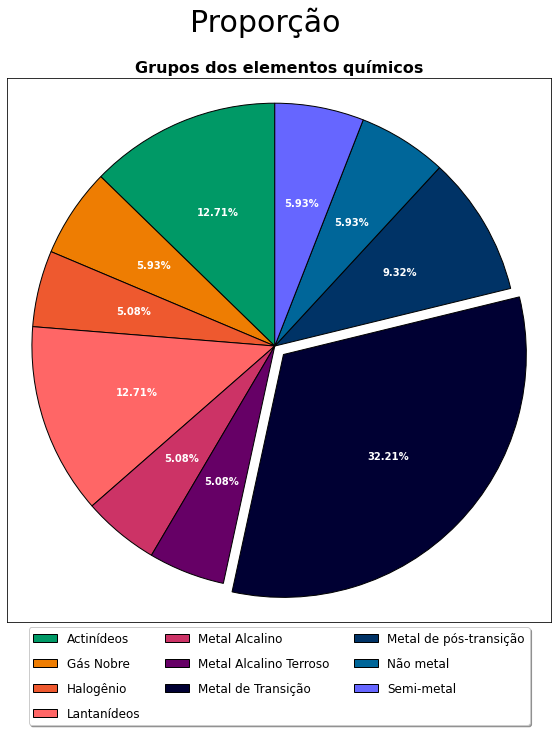

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dados
X = df_freq_prop_grupos['Proporcao']
X_label_legenda = df_freq_prop_grupos['Grupo']
X_label_grafico = [(str(np.around((proporcao * 100), 2)) + ' %') for proporcao in df_freq_prop_grupos['Proporcao']]

#c Cores
cores = ["#009966", "#ee7d02", "#ee592f", "#ff6666", "#cc3366",
         "#660066", "#000033", "#003366", "#006699", "#6666ff"]

# Gráfico
ax.pie(X, 
       shadow = False,
       #labels = X_label_grafico,
       autopct= '%1.2f%%',
       textprops={'color':"w", 'fontweight':'bold'},
       labeldistance = 1.1,
       frame =  True,
       explode = (X == max(X)) * 0.05,
       startangle = 90,
       colors = cores,
       wedgeprops = {'linewidth': 1, 'visible': True, 'linestyle':'-', 'edgecolor':'black'})

# Titulos
ax.set_title('Grupos dos elementos químicos', fontweight = 'bold', fontsize = 16)
plt.suptitle('Proporção', fontsize = 30)

# Removendo ambos os tick e labels dos eixos (para deixar uma borda no gráfico)
plt.tick_params(left = False,
                right = False,
                labelleft = False,
                labelbottom = False,
                bottom = False)

# Legenda
plt.legend(#title = 'Grupos', 
           labels = X_label_legenda, 
           loc = 'lower center',
           bbox_to_anchor = (0.5, -0.20),        
           ncol = 3, 
           fancybox = True,
           shadow = True,
           fontsize = 12,
           title_fontsize = 15,
           labelspacing = 1) 

# Show
plt.show()

<h1><b>Análises</b></h1>

In [86]:
import seaborn as sns

<h1><b>Relação Número Atômico x Massa Atômica</b></h1>

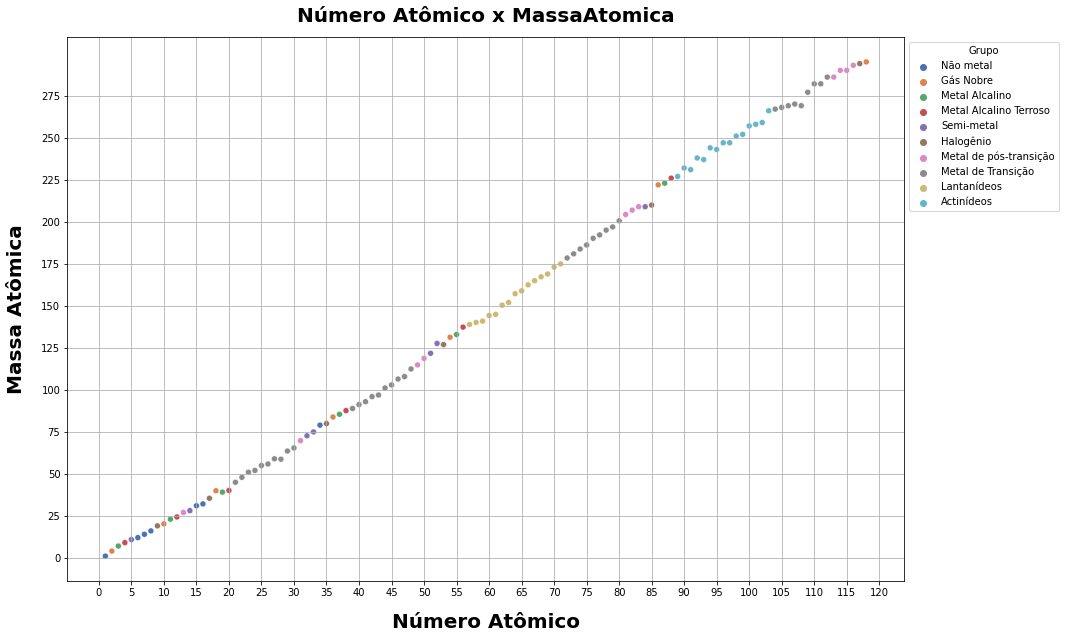

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dados
dados = df[(df['NumeroAtomico'].isna() == False) & (df['MassaAtomica'].isna() == False)]

# Gráfico
sns.scatterplot(data=dados, x='NumeroAtomico', y='MassaAtomica', hue='Grupo', palette="deep")

# Ticks
ax.xaxis.set_ticks(np.arange(0, 125, 5))
ax.yaxis.set_ticks(np.arange(0, 300, 25))

# Adicionando círculo para destacar os valores dos lantanídeos
#circle1 = plt.Circle((95, 250), radius=20, color='r', fill=False)
#ax.add_patch(circle1)

# Titulos
ax.set_title('Número Atômico x MassaAtomica', fontweight = 'bold', fontsize = 20, pad = 15)
ax.set_ylabel('Massa Atômica', fontweight = 'bold', fontsize = 20, labelpad= 15)
ax.set_xlabel('Número Atômico', fontweight = 'bold', fontsize = 20, labelpad= 15)

# Legenda
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Show
ax.grid()
plt.show()


<h1><b>Relação Número Atômico x Eletronegatividade</b></h1>

In [88]:
# Agrupando por período e retornando o maior valor de Eletronegatividade
# Considera apenas os dados que não sejam iguais a NaN
eletronegatividade = df[df['Eletronegatividade'].isna() == False]
maior_eletro = eletronegatividade.groupby(['Período'])['Eletronegatividade'].max().reset_index(name = 'MaiorValor')

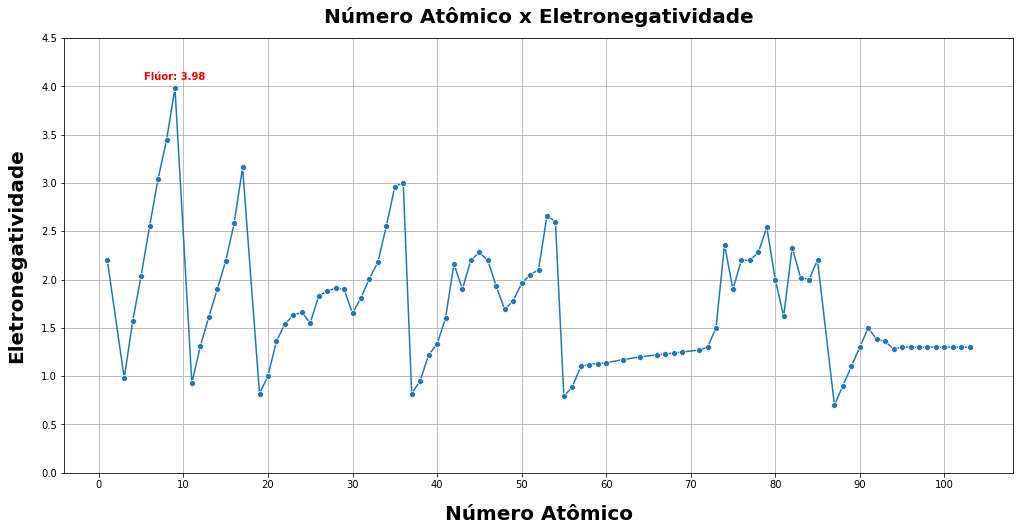

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))

# Dados
dados = df[(df['NumeroAtomico'].isna() == False) & (df['Eletronegatividade'].isna() == False)]

# Gráfico
sns.lineplot(data = dados, x='NumeroAtomico', y='Eletronegatividade', marker='o')

# Ticks
ax.xaxis.set_ticks(np.arange(0, 110, 10))
ax.yaxis.set_ticks(np.arange(0, 5, 0.5))

# Titulos
ax.set_title('Número Atômico x Eletronegatividade', fontweight = 'bold', fontsize = 20, pad = 15)
ax.set_ylabel('Eletronegatividade', fontweight = 'bold', fontsize = 20, labelpad= 15)
ax.set_xlabel('Número Atômico', fontweight = 'bold', fontsize = 20, labelpad= 15)

# Exibindo os dados do Flúor, que é o mais eletronegativo
#for x, nome, y in zip(valores['NumeroAtomico'], valores['Nome'], valores['Eletronegatividade']):
y = 3.98
texto = 'Flúor: {0:.2f}'.format(y)
ax.text(9, 4.1, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Legenda
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Show
ax.grid()
plt.show()

<h2>Para os elementos do Período 6</h2>

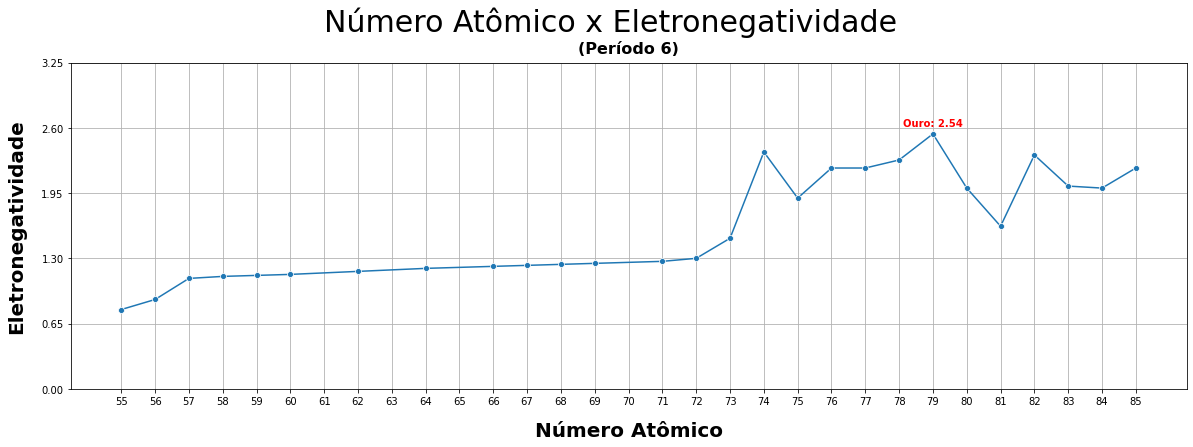

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Dados
dados = df[(df['NumeroAtomico'].isna() == False) & (df['Eletronegatividade'].isna() == False) & (df['Período'] == 'Período 6')]

# Gráfico
sns.lineplot(data = dados, x='NumeroAtomico', y='Eletronegatividade', marker='o')

# Ticks
ax.xaxis.set_ticks(np.arange(55, 86, 1))
ax.yaxis.set_ticks(np.arange(0, 3.5, 0.65))

# Titulos
#ax.set_title('', fontweight = 'bold', fontsize = 20, pad = 15)

ax.set_title('(Período 6)', fontweight = 'bold', fontsize = 16, pad = 9)
plt.suptitle('Número Atômico x Eletronegatividade', fontsize = 30, y = 1.01)

ax.set_ylabel('Eletronegatividade', fontweight = 'bold', fontsize = 20, labelpad= 15)
ax.set_xlabel('Número Atômico', fontweight = 'bold', fontsize = 20, labelpad= 15)

# Exibindo os maiores valores de Eletronegatividade
#for x, nome, y in zip(dados['NumeroAtomico'], dados['Nome'], dados['Eletronegatividade']):
#    texto = '{0}: {1:.2f}'.format(nome, y)
#    ax.text(x, y, texto, color='red')

# Exibindo dados do Ouro (mais eletronegativo do Período 6)
y = 2.54
texto = 'Ouro: {0:.2f}'.format(y)
ax.text(79, 2.65, texto, color='red', horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Legenda
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Show
ax.grid()
plt.show()